In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
import time
import copy

In [2]:
import polcal

In [3]:
path_sim = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/Simulation/'

In [4]:
uvd_raw = UVData()
uvd_raw.read(path_sim+'zen.2457755.25677.uvCP.uvh5')
uvd_sim = UVData()
uvd_sim.read(path_sim+'zen.2457755.25677.uvCP.uvh5')

In [5]:
uv_polcal_single = polcal.uvdata_pol_calibrator(model_data=uvd_sim, real_data=uvd_raw, mode="model_based")

In [6]:
uv_polcal_single.data_slice(use_all_times=True, use_all_ants=True, base_freq_range=[300], prod_freq_range=[300])

In [7]:
uv_polcal_single.base_data_array.shape

(19, 19, 61, 2, 2)

In [8]:
gain_array_iterations = []
for iteration in [10]:#,20,30,40,50,100,200,500,1000,2000,3000,4000]:
    start_time = time.time()
    ### Run the calibration ###
    test = uv_polcal_single.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
    print("--- %s seconds ---" % (time.time() - start_time))
    print(uv_polcal_single.gain_array[0,300])
    gain_array_iterations.append(copy.deepcopy(uv_polcal_single.gain_array[:,300]))

base (19, 19, 61, 2, 2)
prod (19, 19, 61, 2, 2)
freqs2cal [300]
gain_array shape [19, 1024, 2, 2]
wtf [19, 1024, 2, 2, 10]
gain_array_iter shape (19, 1024, 2, 2, 10)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
gain_prev shape (19, 2, 2)
--- 1.7239243984222412 seconds ---
[[ 1.00000000e+00+0.00000000e+00j -7.27792022e-17+4.33680869e-19j]
 [-4.72257416e-19+4.33680869e-19j  1.00000000e+00-5.00088252e-18j]]


In [10]:
test[0,300,:,:,1]

array([[ 1.00000000e+00+0.00000000e+00j, -3.37738720e-18+4.33680869e-19j],
       [-4.84847241e-19+2.79263480e-36j,  1.00000000e+00-5.10930274e-18j]])

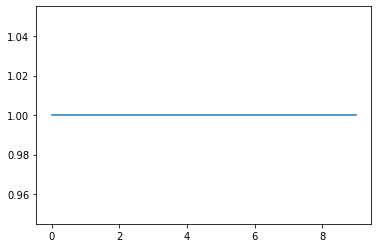

In [14]:
plt.plot(np.abs(test[0,300,1,1,:]))